In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io.wavfile import read, write
sampling_rate, data = read('test_audio.wav')
data = data[:,0]


In [3]:
#back to audio
# from IPython.display import Audio
# audio = write("temp.wav", rate = sampling_rate , data = data[:,1])
# Audio('temp.wav')

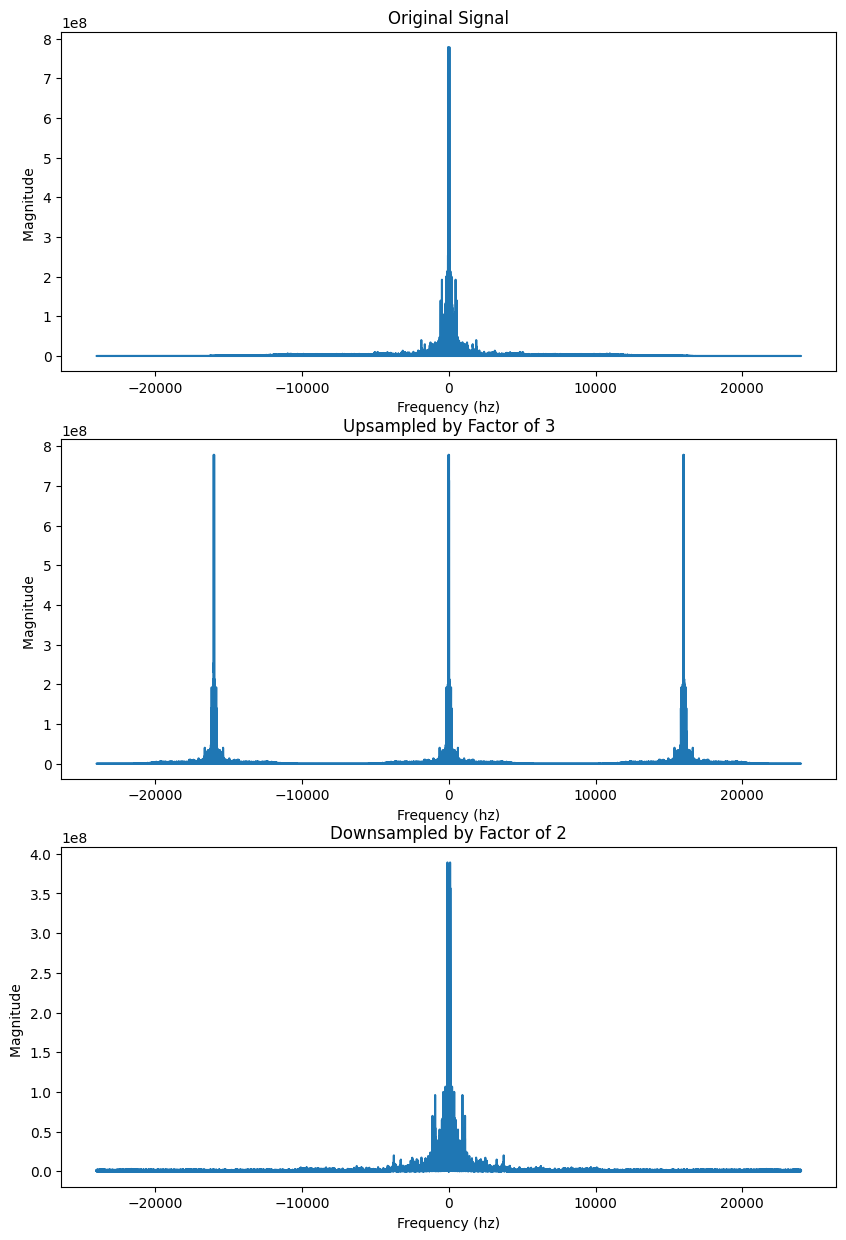

In [20]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
plt.xlabel("Frequency (hz)")
plt.ylabel("Magnitude ")
plt.title("Original Signal")
freqval1 = np.fft.fft(data)
freqs1 = np.fft.fftfreq(len(data))
plt.plot(freqs1*sampling_rate,np.abs(freqval1))

plt.subplot(3,1,2)
plt.xlabel("Frequency (hz)")
plt.ylabel("Magnitude ")
plt.title("Original Signal")
plt.title("Upsampled by Factor of 3")
upsampled = np.zeros(len(data)*3)
upsampled[::3] = data
freqval2 = np.fft.fft(upsampled)
freqs2 = np.fft.fftfreq(len(upsampled))
plt.plot(freqs2*sampling_rate,np.abs(freqval2))

plt.subplot(3,1,3)
plt.xlabel("Frequency (hz)")
plt.ylabel("Magnitude ")
plt.title("Original Signal")
plt.title("Downsampled by Factor of 2")
downsampled = np.zeros(len(data)//2)
downsampled[:] = data[::2]
freqval3 = np.fft.fft(downsampled)
freqs3 = np.fft.fftfreq(len(downsampled))
plt.plot(freqs3*sampling_rate,np.abs(freqval3))



### ANSWER TO QUESTIONS  

The upsampled FFT shrunk by a factor of 3 over the original signal. If we want to preserve our original signal we apply a lowpass filter at FS/upsampled ratio to prevent the spectral copies from entering aliasing.

The downsampled FFT stretched by a factor of 2 over the original signal. If we want to preserve our original signal we must not downsample by too much as it can cause aliasing from the spectral copies.

In [25]:
from IPython.display import Audio
Fs, data = read('test_audio.wav')
data = data[:, 0]

# up_ratio = 1
# down_ratio = 1

# had to use different resampling method since the other one wouldnt work.
output = signal.resample(data, num = data.shape[0]*2)

Audio(output, rate=Fs)

### QUESTION ANSWERS  
with ratio = 2 the pitch is much lower and the song plays much slower due to the additional audio length

with ratio = 1 the song plays like normal

with ratio = 1/2 the song plays with much higher frequencies and the audio length is shorter